In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("neurips_review_comp_rate.csv")

In [3]:
df["date"] = pd.to_datetime([t for t in df.date],
                            format="%Y/%m/%d/%H")

Text(0.5, 0, 'date')

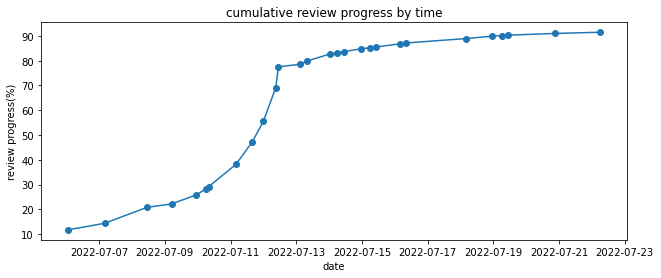

In [4]:
plt.figure(figsize=(10.5, 4))
plt.title("cumulative review progress by time")
plt.plot(df.date,
         df.review_rate,
         "o-")
plt.ylabel("review progress(%)")
plt.xlabel("date")

## interpolation

In [5]:

dti = pd.date_range("2022-07-06-01", periods=24*17-18, freq="H")
data_to_pd = {"date": dti}
df2 = pd.DataFrame(data_to_pd)
for i, row in df.iterrows():
    df2.loc[df2.date == row.date, "review_rate"] = row.review_rate

intered = pd.Series(df2.review_rate).interpolate(method="slinear")
df2["review_rate"] = intered

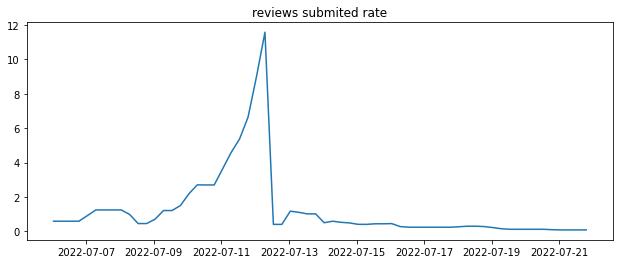

In [6]:
plt.figure(figsize=(10.5, 4))
plt.title("reviews submited rate")
plt.plot(df2[::6].date[:-1], np.diff(df2[::6].review_rate))